# ANALASIS DE DATOS

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [33]:
df = pd.read_csv('vaccination_all_tweets.csv')

In [34]:
df.head()


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [35]:
df.isnull().sum()

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [36]:
df.isnull().any()

id                  False
user_name            True
user_location        True
user_description     True
user_created        False
user_followers      False
user_friends        False
user_favourites     False
user_verified       False
date                False
text                False
hashtags             True
source               True
retweets            False
favorites           False
is_retweet          False
dtype: bool

In [37]:
df['user_location'].isnull().sum()

66911

In [38]:
df[df['user_location'].isnull()]


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False
11,1337840331522453507,VoiceM,NaN,campaigner & optimistic realist,2020-08-31 10:38:21,2,25,20,False,2020-12-12 19:22:45,@cnnbrk #COVID19 #CovidVaccine #vaccine #Coron...,"['COVID19', 'CovidVaccine', 'vaccine', 'Corona...",Twitter Web App,0,0,False
13,1337809196453081088,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 17:19:02,For all the women and healthcare providers who...,['PfizerBioNTech'],Twitter for iPhone,48,82,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228179,1460362249399422979,SVV,NaN,Help Sptunik V Vaccinated !,2021-11-03 15:06:43,2,18,14,False,2021-11-15 21:41:07,2- A-lot of people stop them works because the...,NaN,Twitter for iPhone,1,3,False
228180,1460360627801706499,SVV,NaN,Help Sptunik V Vaccinated !,2021-11-03 15:06:43,2,18,14,False,2021-11-15 21:34:40,1- Millions of people how vaccinated with #Spu...,['SputnikV'],Twitter for iPhone,2,6,False
228181,1460359704643784710,SVV,NaN,Help Sptunik V Vaccinated !,2021-11-03 15:06:43,2,18,14,False,2021-11-15 21:31:00,@alexandrelatsa And when gonna allowed #Sputni...,['SputnikV'],Twitter for iPhone,1,2,False
228182,1460307813310337027,SVV,NaN,Help Sptunik V Vaccinated !,2021-11-03 15:06:43,2,18,14,False,2021-11-15 18:04:48,@sputnikvaccine I wish saudia arbia accept the...,['SputnikV'],Twitter for iPhone,0,3,False


In [39]:
df.dropna(subset=['user_location'], inplace=True)

In [40]:
df[df.isnull().any(axis=1)]

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False
12,1337815730486702087,WION,India,#WION: World Is One | Welcome to India’s first...,2016-03-21 03:44:54,292510,91,7531,True,2020-12-12 17:45:00,The agency also released new information for h...,NaN,TweetDeck,0,18,False
23,1337773751841144833,BOOM Live,"Mumbai, India",IFCN certified fact-driven journalism. India's...,2014-03-16 03:52:50,64185,1183,1794,True,2020-12-12 14:58:11,The US Food and Drug Administration (FDA) has ...,NaN,Twitter Web App,1,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228086,1460971387640758281,𝓒𝓪𝓷𝓭𝓮𝓮,Worldwide,"I love music, sports and adventure. Live, Love...",2020-01-02 16:48:54,34,206,382,False,2021-11-17 14:01:37,@rdif_press @AltoEscandaloOk @sputnikvaccine @...,NaN,Twitter for iPhone,1,6,False
228089,1460958950699016199,Rhombics Board Game,USA,design of board games (They/Them) 🌈❤️🧡💛💚💙💜🏳️‍...,2013-08-11 15:50:13,102,1419,27108,False,2021-11-17 13:12:11,@Forbes Not a single Russian vaccine has been ...,NaN,Twitter for iPad,0,0,False
228120,1460820743672016903,India Post,"Fremont, CA, USA",Refresh yourself every morning with IndiaPost ...,2009-03-24 20:03:31,683,724,17,False,2021-11-17 04:03:00,Vaccinating 5-11 Year Olds: Voices from the Fr...,NaN,IndiaPost,0,0,False
228132,1460754324099944452,𝓒𝓪𝓷𝓭𝓮𝓮,Worldwide,"I love music, sports and adventure. Live, Love...",2020-01-02 16:48:54,34,206,382,False,2021-11-16 23:39:05,@ApuWall @AltoEscandaloOk @sputnikvaccine @POT...,NaN,Twitter for iPhone,4,5,False


In [41]:
df.shape

(161296, 16)

# TRATAMIENTO Y LIMPIEZA DE DATOS 

In [42]:
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,1.612960e+05,1.612960e+05,161296.000000,1.612960e+05,161296.000000,161296.000000
mean,1.406976e+18,1.277393e+05,1208.913910,1.380803e+04,3.102873,13.680903
std,3.020753e+16,9.867145e+05,6195.527053,4.054757e+04,60.276908,234.231578
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.380649e+18,5.800000e+01,76.000000,1.310000e+02,0.000000,0.000000
50%,1.406201e+18,4.210000e+02,328.000000,1.692000e+03,0.000000,1.000000
75%,1.430954e+18,2.558000e+03,998.000000,9.617000e+03,1.000000,3.000000
max,1.463250e+18,1.635305e+07,582461.000000,1.214813e+06,12294.000000,54017.000000


In [43]:
df.dtypes

id                   int64
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
dtype: object

In [44]:
string_columns = df.select_dtypes(include='object').columns
print(string_columns)

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'date', 'text', 'hashtags', 'source'],
      dtype='object')


In [45]:
df['date'] = pd.to_datetime(df['date'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161296 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                161296 non-null  int64         
 1   user_name         161296 non-null  object        
 2   user_location     161296 non-null  object        
 3   user_description  154843 non-null  object        
 4   user_created      161296 non-null  object        
 5   user_followers    161296 non-null  int64         
 6   user_friends      161296 non-null  int64         
 7   user_favourites   161296 non-null  int64         
 8   user_verified     161296 non-null  bool          
 9   date              161296 non-null  datetime64[ns]
 10  text              161296 non-null  object        
 11  hashtags          121239 non-null  object        
 12  source            161285 non-null  object        
 13  retweets          161296 non-null  int64         
 14  favo

In [47]:
new_df = df.copy()

In [48]:
new_df['user_name'] = new_df['user_name'].str.lower()

In [49]:
new_df['user_description_numbers'] = new_df['user_description'].str.extract('(\d+)').astype(float)

In [50]:
replacements = {'Antiguo hashtag': 'Nuevo hashtag', 'Otro antiguo hashtag': 'Otro nuevo hashtag'}
new_df['hashtags'].replace(replacements, inplace=True)

In [51]:
new_df['date'] = pd.to_datetime(new_df['date'])

In [52]:
new_df.drop(['is_retweet'], axis=1, inplace=True)

In [53]:
new_df.dtypes

id                                   int64
user_name                           object
user_location                       object
user_description                    object
user_created                        object
user_followers                       int64
user_friends                         int64
user_favourites                      int64
user_verified                         bool
date                        datetime64[ns]
text                                object
hashtags                            object
source                              object
retweets                             int64
favorites                            int64
user_description_numbers           float64
dtype: object

In [54]:
new_df.drop_duplicates(inplace=True)

In [55]:
print(new_df.isnull().sum())

id                               0
user_name                        0
user_location                    0
user_description              6453
user_created                     0
user_followers                   0
user_friends                     0
user_favourites                  0
user_verified                    0
date                             0
text                             0
hashtags                     40057
source                          11
retweets                         0
favorites                        0
user_description_numbers    102861
dtype: int64


In [56]:
new_df['user_location'].fillna('Unknown', inplace=True)
new_df['user_description'].fillna('No description', inplace=True)
new_df['user_description_numbers'].fillna(0, inplace=True)
new_df['hashtags'].fillna('No hashtags', inplace=True)
new_df['source'].fillna('Unknown source', inplace=True)

In [57]:
encoder = LabelEncoder()
new_df['source'] = encoder.fit_transform(new_df['source'])

C:\Users\Claudia\AppData\Local\Temp\ipykernel_1948\1481554508.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new_df.corr()


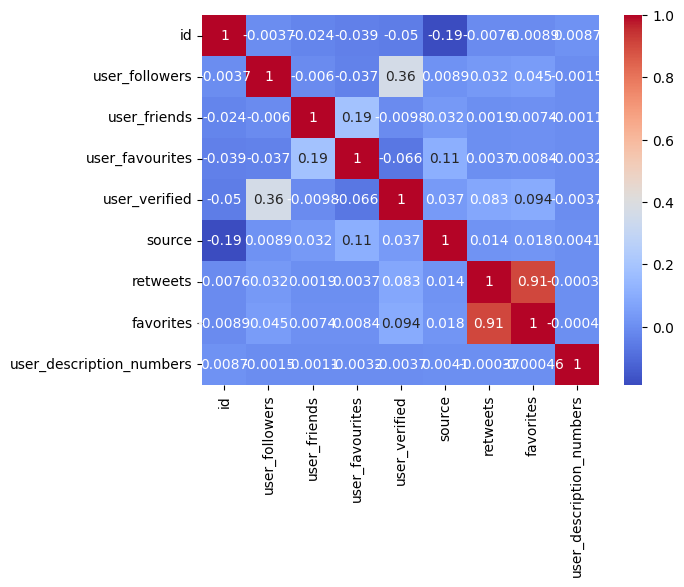

In [58]:
correlation_matrix = new_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [60]:
target = 'favorites'
features = [x for x in new_df.columns if x != target]

In [ ]:
print(target)
print(features)